In [1]:
! pip install pandas-datareader

In [1]:
import pandas as pd
import requests
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl

# 폰트 변환

# MacOS
mpl.rc("font", family='AppleGothic')

# 마이너스 사인 수정
mpl.rc('axes', unicode_minus=False)

In [3]:
df = pd.DataFrame()

for page in range(1, 101):
    url = f'https://finance.naver.com/item/sise_day.naver?code=035720&page={page}'
    req = requests.get(url, headers={'User-agent':'Mozilla/5.0'})
    df = df.append(pd.read_html(req.text, header=0)[0])

In [4]:
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0, flags=flags)


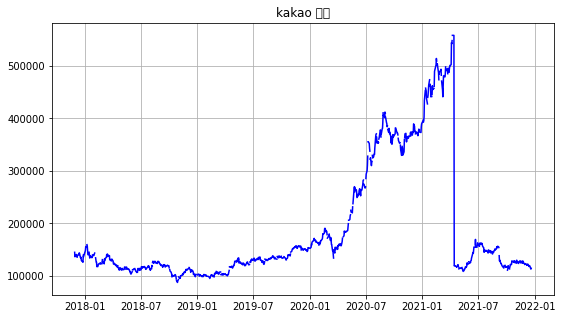

In [5]:
plt.figure(figsize=(9,5))
plt.title("kakao 종가")
plt.plot(df['날짜'], df['종가'], 'b')
plt.grid(True)
plt.show()

In [6]:
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
df.iloc[169: 175]

,날짜,종가,전일비,시가,고가,저가,거래량
169,2021-04-16,119000.0,1500.0,115500.0,120500.0,115500.0,13709555.0
170,2021-04-15,120500.0,8500.0,120500.0,132500.0,118000.0,17115015.0
171,2021-04-14,558000.0,0.0,0.0,0.0,0.0,0.0
172,2021-04-13,558000.0,0.0,0.0,0.0,0.0,0.0
173,2021-04-12,558000.0,0.0,0.0,0.0,0.0,0.0
174,2021-04-09,558000.0,10000.0,554000.0,561000.0,551000.0,788839.0


In [8]:
#전처리 
df.loc[171:]['종가'] = df.loc[171:]['종가'] /5
df.loc[171:]['시가'] = df.loc[171:]['시가'] /5
df.loc[171:]['고가'] = df.loc[171:]['고가'] /5
df.loc[171:]['저가'] = df.loc[171:]['저가'] /5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [9]:
# 날짜순으로 정리. 최근이 맨 뒤로 
df = df.sort_values(by='날짜')

In [20]:
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
999,2017-11-29,29000.0,500.0,29200.0,29300.0,28400.0,1022981.0
998,2017-11-30,27300.0,8500.0,29000.0,29100.0,27000.0,1808464.0
997,2017-12-01,28000.0,3500.0,27300.0,28200.0,27300.0,867012.0
996,2017-12-04,27900.0,500.0,28100.0,28600.0,27700.0,481190.0
995,2017-12-05,28100.0,1000.0,27800.0,28200.0,26800.0,779716.0


In [10]:
# MinMaxScale 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled, columns = scale_cols)
df_scaled

,시가,고가,저가,종가,거래량
0,0.169767,0.169364,0.176398,0.075536,0.054140
1,0.168605,0.168208,0.167702,0.064351,0.095710
2,0.158721,0.163006,0.169565,0.068956,0.045885
3,0.163372,0.165318,0.172050,0.068298,0.025466
4,0.161628,0.163006,0.166460,0.069614,0.041265
...,...,...,...,...,...
995,0.683140,0.687861,0.726708,0.664430,0.056640
996,0.694767,0.696532,0.736025,0.671009,0.061853
997,0.686047,0.687861,0.729814,0.657850,0.066952
998,0.677326,0.676301,0.701863,0.628241,0.158231


In [11]:
#과거 300일을 기준으로 학습하고자 함.
# test_size = 20% 

train = df_scaled[:-60 ]
test =df_scaled[-60:]

In [13]:
test.shape

(60, 5)

In [12]:
feature_cols = ['시가', '고가', '저가', '거래량']
label_col = ['종가']

### 위는 건드리지 말자!

In [14]:
train_feature = train[feature_cols]
train_label = train[label_col]
test_feature = test[feature_cols]
test_label = test[label_col]

In [73]:
test_label.shape

(60, 1)

In [15]:
def make_data(data, label, window_size=20):
    feature_list=[]
    label_list=[]
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [16]:
train_input, train_target = make_data(train_feature, train_label, 20)
test_input, test_target = make_data(test_feature, test_label, 20)

In [17]:
train_input.shape, train_target.shape

((920, 20, 4), (920, 1))

In [18]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [19]:
val_input.shape

(184, 20, 4)

In [20]:
test_input.shape, test_target.shape

((40, 20, 4), (40, 1))

In [21]:
test_target

array([[0.73022766],
       [0.71048822],
       [0.71048822],
       [0.71048822],
       [0.72693775],
       [0.70390841],
       [0.74009738],
       [0.73022766],
       [0.70719832],
       [0.71048822],
       [0.7006185 ],
       [0.71048822],
       [0.72035794],
       [0.73351757],
       [0.72364785],
       [0.70719832],
       [0.70390841],
       [0.72035794],
       [0.73022766],
       [0.70390841],
       [0.70390841],
       [0.72693775],
       [0.71048822],
       [0.69403869],
       [0.68745888],
       [0.69074878],
       [0.69074878],
       [0.6973286 ],
       [0.68087906],
       [0.67758916],
       [0.68087906],
       [0.69074878],
       [0.69074878],
       [0.67429925],
       [0.66442953],
       [0.66442953],
       [0.67100934],
       [0.65784972],
       [0.62824056],
       [0.63811028]])

In [22]:
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [23]:
model = Sequential()
model.add(LSTM(units=10, input_shape=(train_input.shape[1], train_input.shape[2]), activation ='relu', return_sequences=True))
model.add(Dense(1))
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7faa2b79cf10>>

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
checkpoint_cb = callbacks.ModelCheckpoint('best-model.h5',save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_input, train_target, epochs=200, batch_size=30, validation_data = (val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [25]:
train_target.shape

(736, 1)

In [26]:
# 예측하기 

pred = model.predict(test_input)

In [30]:
test_input.shape

(40, 20, 4)

In [28]:
pred.shape

(40, 20, 1)

In [51]:
test_target.shape

(40, 20, 1)

ValueError: ignored

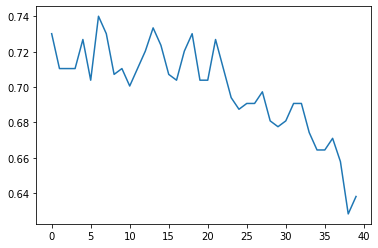

In [29]:
plt.figure()
plt.plot(test_target, label = 'real kakao stock price')
plt.plot(pred, label = 'predicted kakao stock price')
plt.xlabel('time')
plt.ylabel('stock price(KRW')
plt.legend()
plt.show()